In [1]:
## testing the OOP implementation of the project framework. 

In [1]:
def CI_5(x) :
    return np.percentile(x, 5)

def CI_95(x) :
    return np.percentile(x, 95)

def CI_25(x) :
    return np.percentile(x, 25)

def CI_75(x) :
    return np.percentile(x, 75)


In [2]:
import parameters as param
import sys


In [3]:
import sys
import os
from load_paths import load_box_paths
#mpl.rcParams['pdf.fonttype'] = 42

import parameters as param


##directories
user_path = os.path.expanduser('~')
datapath, projectpath, wdir, exe_dir, git_dir = load_box_paths()

sim_output_path = os.path.join(wdir, 'sample_trajectories')
plot_path = os.path.join(wdir, 'sample_plots')

In [14]:
wdir

'C:\\Users\\garrett\\Box/covid_chicago/cms_sim/'

In [4]:
sim_output_path

'C:\\Users\\garrett\\Box/covid_chicago/cms_sim/sample_trajectories'

In [5]:
sys.path.append(git_dir)
sys.path.append(os.path.join(git_dir, 'spatial_model/'))

In [6]:
import model_classes as mc

In [7]:
param_dic={'ki':[4.45e-6],
           'incubation_pd':[6.63],
           'recovery_rate':[16],
           'waning':[180]}

In [8]:
### instantiating the model1 as a spatial_model class
model1= mc.spatial_model(param_dic)

In [9]:
type(param.groupdic_filename)

str

In [10]:
### using the read_group_dictionary method to read in the county dictionary (which contains population info for each county)
county_dic=model1.read_group_dictionary(filepath= os.path.join(git_dir, 'spatial_model', param.groupdic_filename),
                                        grpname ='county',
                                        testMode=param.testMode,
                                        ngroups=param.ngroups
                                       )

In [17]:
county_dic

{'Adams': [66427, 0, 1, 0], 'Alexander': [6532, 0, 1, 0]}

In [11]:
### generating emodl
model1.generate_emodl(county_dic, param_dic,
                      emodl_output= os.path.join(git_dir, 'spatial_model','locale_covid.emodl'),
                      verbose=False)

emodl generated


In [12]:
nscen = model1.runExp(param.Kivalues, sub_samples=2, exe_dir=exe_dir, git_dir=git_dir)

4.45e-06
6e-06
4.45e-06
6e-06


In [15]:
df = model1.combineTrajectories(nscen,sim_output_path=sim_output_path, git_dir=git_dir)

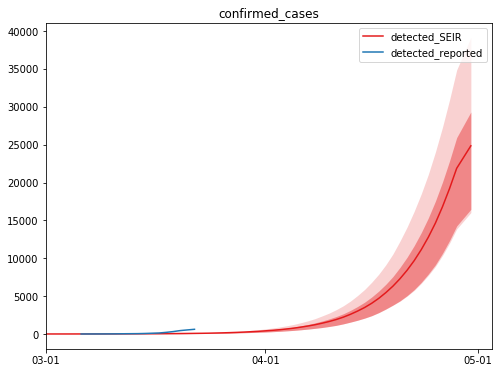

In [16]:
model1.detection_plot( df,param.first_day, git_dir=git_dir, allchannels='detected_cumul', chicago=True, chicago_filepath=os.path.join(wdir,'chicago/chicago_cases.csv'), save=False, plotname="detected_plot" )